# Decision Tree Model on Classification of Gender by Voice of healthy individuals 

In the previous percetron models (Perceptron and Logistic Regression) we have relied on two variables the F0 'meanfun' and the mean frequency of connect speech 'meanfreq'. In current model, we utilizes the complete dataset to perform the classicaiton task with the decision tree. 

---
### The model - decision tree 

A decision tree is a model used in machine learning that constructs a tree-like structure to make predictions. In the Scikit-Learn library, it employs the Classification and Regression Tree (CART) algorithm that generates binary trees, meaning each node splits into only two child nodes. The purity of each node is assessed by its Gini attribute, with a Gini coefficient of 0 indicating that all training instances at the node belong to the same class, thus making it completely pure.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



df = pd.read_csv('gender_voice.csv', delimiter=',')
df.dataframeName = 'gender voice.csv'

In [18]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2217, 20)
Test shape: (951, 20)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2122, 20)
Test shape: (1046, 20)


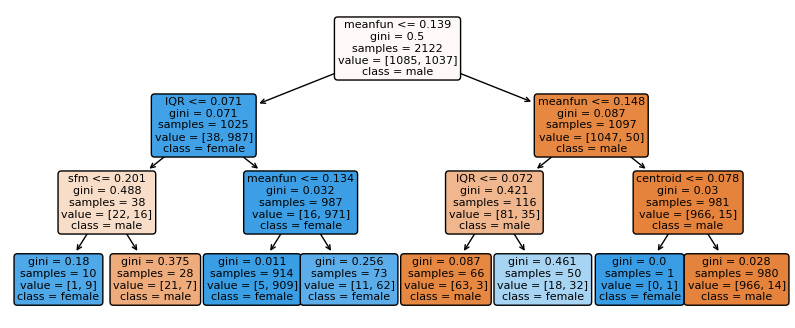

In [20]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target column

# Get the feature names from the DataFrame
feature_names = X.columns.tolist()


# Plot the tree
plt.figure(figsize=(10, 4))
a = plot_tree(decision_tree,
              feature_names=feature_names,
              class_names=["male", "female"],
              rounded=True,
              filled=True, 
              fontsize=8)
plt.show()

Accuracy: 0.9655831739961759
Classification Report:
              precision    recall  f1-score   support

      female       0.97      0.96      0.96       499
        male       0.96      0.97      0.97       547

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



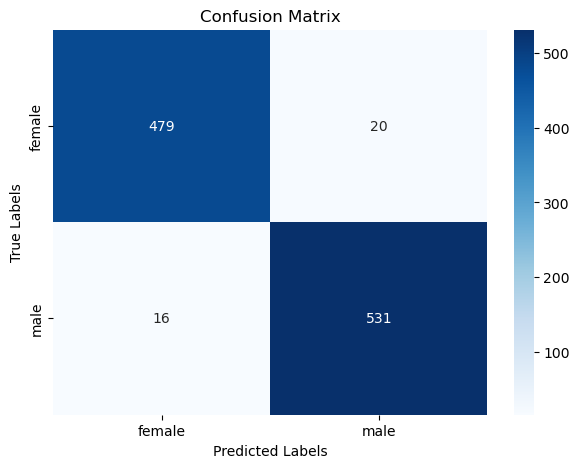

In [26]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Conclusion

The decision tree model performed excellently on the training set, achieving an accuracy of 0.9656. The model effectively differentiated between male and female classes, as evidenced by the high precision, recall, and F1-scores close to 0.97 for both categories. This indicates that the decision tree is well-suited for this dataset, which is sufficiently large to support such a model. 

However, when applied to classification tasks involving Parkinson's, REM sleep behavior disorder, and healthy control data, performance dropped to around 71-72%, similar to the KNN model (not shared here). This decrease in performance may be attributed to differences in dataset sizes.
